# Programming for Data Analysis - Assignment

## Generation of random numbers using the `numpy.random` package
***

### Table of Contents

1. [Introduction](#Introduction)
    * [Overall purpose of the package](#Overall_purpose)
    * [How to generate random numbers? What is the difference between a true random number generator and a pseudo-random generator?](#How_to_generate_RN)
    * [Why use `numpy.random`?](#Why_use_nprandom)
1. [Understanding the `numpy.random` visually](#Understanding_nprandom_visual)
    * [Dimensionality of arrays](#Dimensionality_of_arrays)
1. [Simple Random Data and Permutations functions](#Simple_and_Permutations)
    * [Simple Random Data](#Simple)
    * [Permutations](#Permutations)
1. [Use and purpose of selected “Distributions” functions](#Distributions_functions)
    * [Beta distribution](#beta_distribution)
    * [Exponential distribution](#exponential_distribution)
    * [Laplace distribution](#laplace_distribution)
    * [Poisson distribution](#poisson_distribution)
    * [Rayleigh distribution](#rayleigh_distribution)
1. [Use of seeds in generating pseudorandom numbers](#Seeds)
1. [Conclusion](#Conclusion)

***

## 1. <a name='Introduction'></a>Introduction
***

### <a name='Overall_purpose'></a>Overall purpose of the package
Random numbers are used widely in several computational science areas, including in:
- statistical sampling: for example, in a quality control test, it is definitely more feasible to test a subset (randomly picked) rather than the entire lot of products.
- image analysis to ensure a particular algorithm is able to distinguish between features and noise
- cryptography so that a secret message, such as your credit card details, can be transmitted securely without anyone else being able to read it
- gaming and gambling:
- bioinformatics - cluster analysis, bootstrapping tests and stochastic simulations of biosystems (http://www0.cs.ucl.ac.uk/staff/d.jones/GoodPracticeRNG.pdf)
- [and more](https://en.wikipedia.org/wiki/Applications_of_randomness)

Notes: Equations are rendered here using Tex/MathJax ([1](https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html#Motivating-Examples) and [2](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference)), with assistance from [Detexify](http://detexify.kirelabs.org/classify.html) and [Emre Sermutlu's compilation](https://pic.plover.com/MISC/symbols.pdf).

### <a name='How_to_generate_RN'></a>How to generate random numbers? What is the difference between a true random number generator and a pseudo-random generator?

Now we know why random numbers are important in computational sciences, we need to know how to generate them. Note that there is a whole discipline devoted to the generation on random numbers (read more: https://www.random.org/randomness/ and Tuncer & Kaya (2018) https://www.hindawi.com/journals/cmmm/2018/3579275/).

There are two types of random number generators:

1. true random number generator - these are specialized devices that generate random numbers from microscopic physical processes. In principle, these can be any physical process including mouse-click events of computer users, bioelectric signals such as [electrocardiogram](https://ieeexplore.ieee.org/document/6513218), [atmospheric noise](random.org), thermal noise and the [photoelectric effect](https://en.wikipedia.org/wiki/Photoelectric_effect), so long as these phenomena result in low-level, statistically-random signals.

    While the true generators are non-deterministic, they suffer from poor efficiency and require sophisticated and expensive hardware. In addition, there are many instances where the complexity and expense of true generators are not justified. For example, applications with legal ramifications such as gambling and random drug testing need to be truly random (otherwise, the gambling company may be sued!) whereas simulations in recreational computer games need a large number of random numbers generated in a quick succession not achievable by true generators. In the latter situations, pseudo-random generators come very handy.

1. pseudo-random number generator - Although Nature is a good source of random numbers, computers need to be programmed (in a deterministic manner, based on _a priori_ knowledge) to generate random numbers. To achieve this, either an algorithm (a mathematical equation) or a probability density function (a statistical method) can be used.

    **Computational method**
    One of the most common equation used is the [linear congruential generator](http://demonstrations.wolfram.com/LinearCongruentialGenerators/), defined by [a recurrence relation](https://en.wikipedia.org/wiki/Linear_congruential_generator):
    
    <div align='center'>
    $X_{n+1} = (aX_n + c)\; \textbf{mod} \; m$
    </div>
    
    **Statistical method**
    By definition, the numbers generated by a pseudo-random number generator using a mathematical function results in a continuous uniform distribution defined as follows: $f(x) = \frac{1}{b-a}$. In other words, if we generate a set of random numbers, the frequency by which any given number occurs is (at least theoretically) a constant.

    This set of uniformly-distributed numbers can then be transformed into a different distribution mathematically, through the [inversion method](https://www.statsdirect.com/help/randomization/generate_random_numbers.htm) or the [acceptance-rejection method](https://www.eg.bucknell.edu/~xmeng/Course/CS6337/Note/master/node59.html). There are also more details on [Wikipedia](https://en.wikipedia.org/wiki/Pseudo-random_number_sampling). 


### <a name='Why_use_nprandom'></a>Why use `numpy.random`?

Methods such as the linear congruential generator (described above) and (also linear recursion-based) Mersenne Twister (used by the Python `random()` function) can be easily cracked, resulting in the ability of someone with a malicious intent (a hacker) to predict the sequence of random numbers, so long as he/she has a sufficiently long subsequence of the outputs. In other words, linear recursion-based methods are significantly insecure. Read more: [link1](https://security.stackexchange.com/questions/4268/cracking-a-linear-congruential-generator), [link2](http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/efaq.html) and [link3](https://www.bishopfox.com/blog/2014/08/untwisting-mersenne-twister-killed-prng/)

Where security matters, a subtype of pseudo-random number generators, called [cryptographically-secure pseudo-random number generator (CPRNG)](https://en.wikipedia.org/wiki/Cryptographically_secure_pseudorandom_number_generator) must be used. Consequently, the [Python documentation for the `random()` function](https://docs.python.org/3.7/library/random.html) explicitly warns against its use in cryptography and recommends instead the use of the [`secrets` module](https://docs.python.org/3.7/library/secrets.html#module-secrets). Similarly, the [`numpy.random` package also uses Mersenne Twister](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.RandomState.html).

So [why use this package if they are the same](https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python)? Firstly, not all situations call for the use of CPRNG. In addition, the package is also Numpy-aware, meaning arrays of numbers can be handled more efficiently than the standard Python `random()` function, leading to a more practicable use in statistics and data analytics.

## <a name='Understanding_nprandom_visual'></a>2. Understanding the `numpy.random` visually
***

In this notebook, we will look at the following functions:
1. the “Simple random data” and “Permutations” functions.
1. the use and purpose of at least five “Distributions” functions.
1. the use of seeds in generating pseudorandom numbers.

However, we should first look at `numpy` arrays. Before doing that, let's import some Python libraries:

In [1]:
import numpy as np # we are using the numpy.random package for this notebook

# to make interactive plots with plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

### <a name='Dimensionality_of_arrays'></a>Dimensionality of arrays

This graphics below is an excellent way to visualize simple and multidimensional arrays.

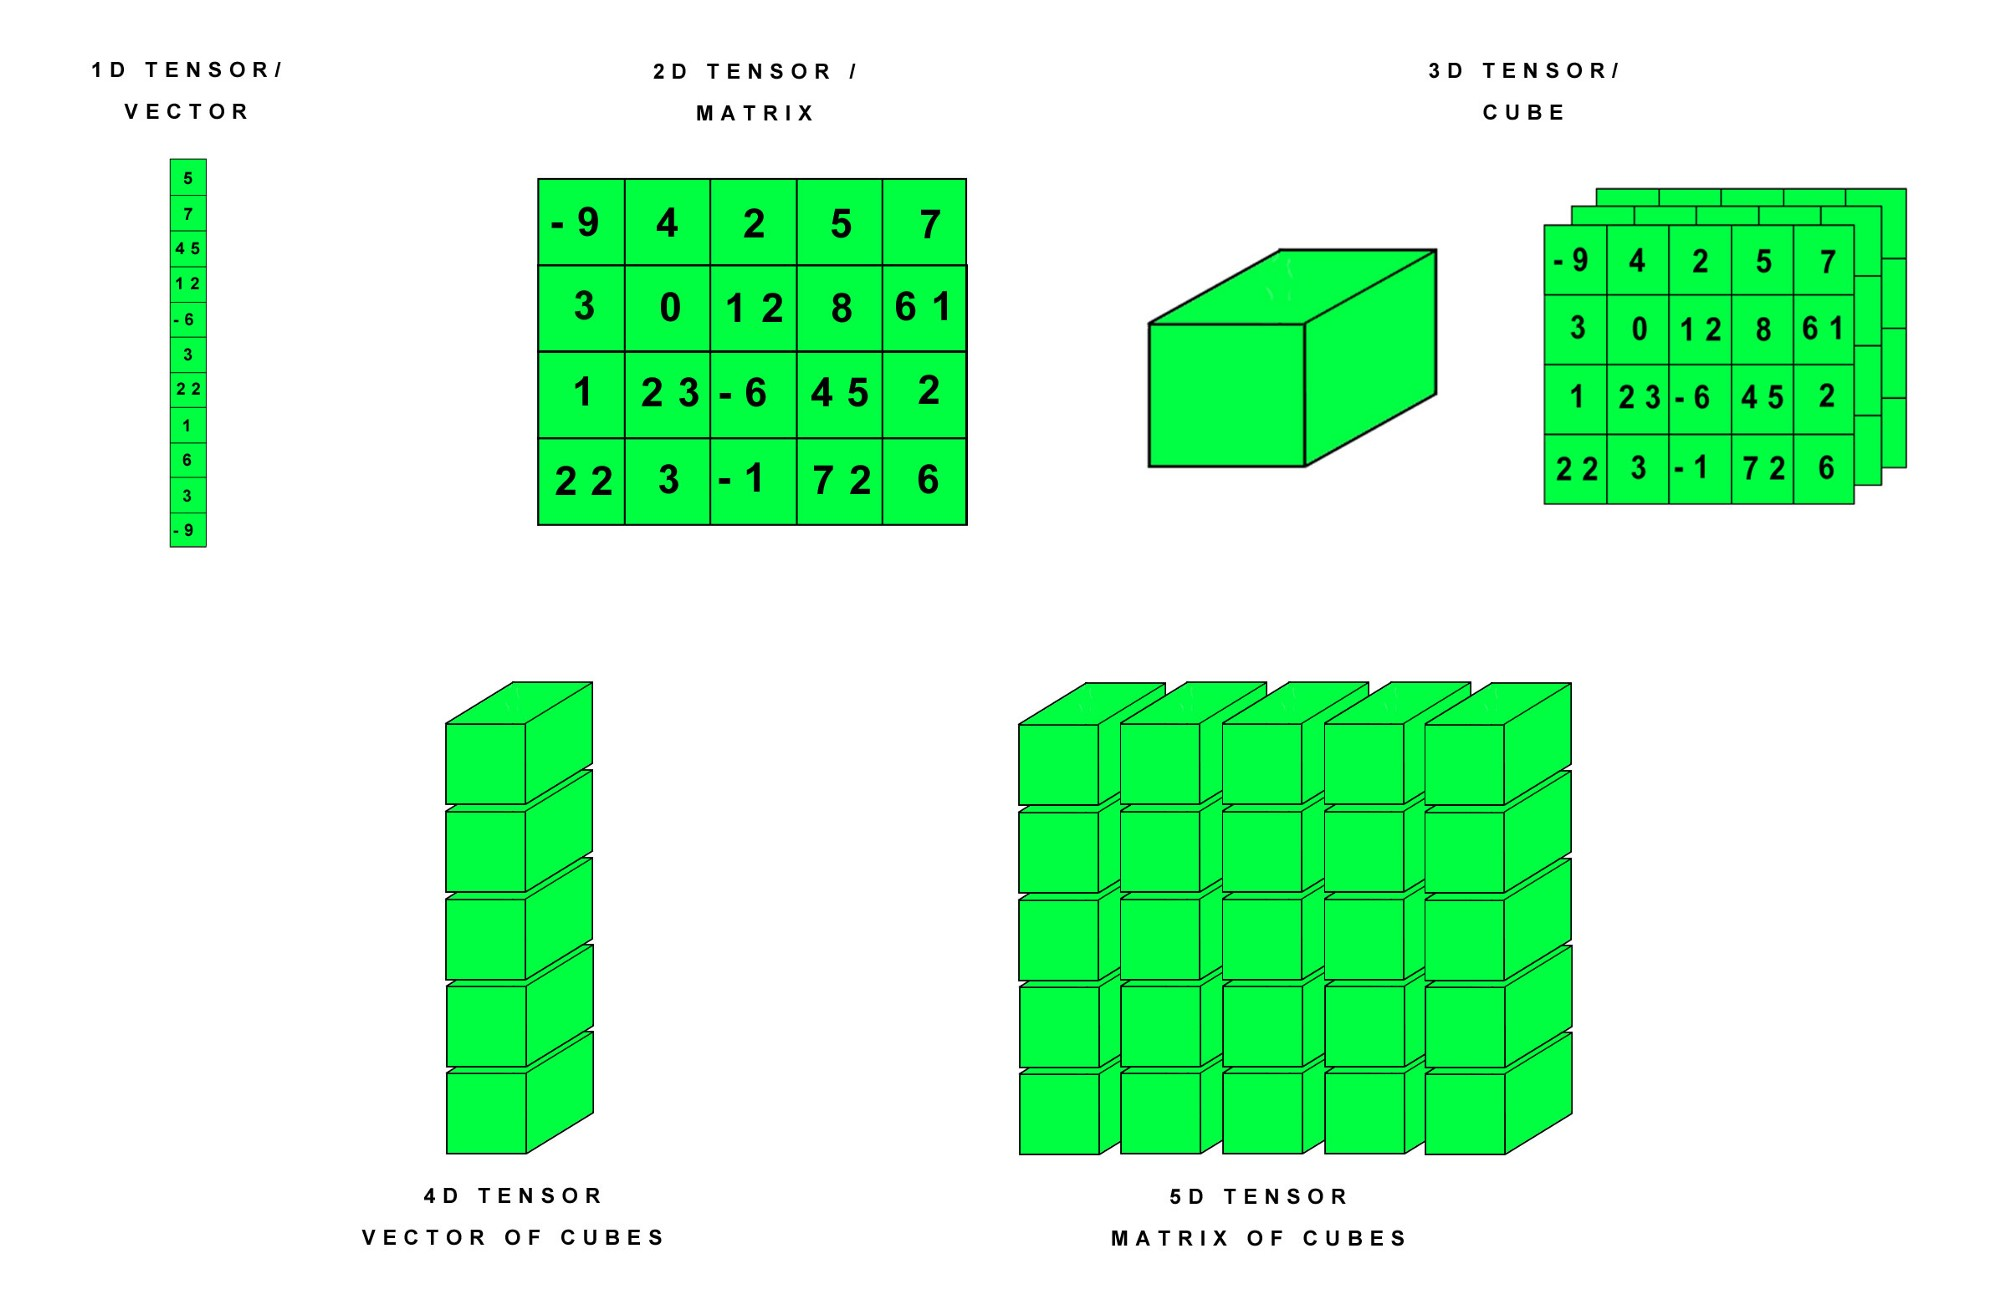

<div style='text-align:right'><i>Taken from <a href='https://hackernoon.com/learning-ai-if-you-suck-at-math-p4-tensors-illustrated-with-cats-27f0002c9b32'>Hacker Noon</a></i></div><br>

At the very basic level, a 1D array is simply a collection of numbers in a column (or a row). By adding another dimension, *i.e.* a row, we now have a collection of numbers arranged in a column AND a row (think of it as a rectangle). This 2D array is a matrix.

This rectangle can be converted into a cube in the third dimension - the best analogy for this is a collection of rectangles arranged like sheets in a book.

We can also stack a few books together on a bookshelf to create a fourth dimension (4D array). As you will see in a library, our books will be arranged on multiple bookshelves (fifth dimension - 5D array).

This visualization technique allows us to construct even more complex arrays. Actually, if you notice carefully, the output of the `rand()` function is already formatted with a white space between two matrices.

#### 1D array of a single row containing three numbers

In [2]:
example_1D_array = np.random.rand(3)
example_1D_array

array([0.14328464, 0.84938915, 0.81919545])

#### 2D array of 2 rows and 3 columns

In [3]:
example_2D_array = np.random.rand(2,3)
example_2D_array

array([[0.50890315, 0.97524271, 0.96090892],
       [0.65975572, 0.27088429, 0.21498891]])

#### 3D array of 2 rows and 3 columns arranged as 4 sheets, making up a cube

Note that the sheets are separated by horizontal white spaces - see the example for 4D array below with an annotated image

In [4]:
example_3D_array = np.random.rand(4,2,3)
example_3D_array

array([[[0.02345631, 0.88394288, 0.2759214 ],
        [0.65395524, 0.24788758, 0.10223122]],

       [[0.0151207 , 0.67998921, 0.02148566],
        [0.29504253, 0.89373511, 0.30173488]],

       [[0.55943681, 0.48322666, 0.62904409],
        [0.74323154, 0.91122845, 0.28485289]],

       [[0.20101961, 0.76310381, 0.90014572],
        [0.54638169, 0.69234013, 0.92288505]]])

#### 4D array of 4 books each consisting of 5 sheets of 2 rows and 3 columns

In [5]:
example_4D_array = np.random.rand(4,5,2,3)
example_4D_array

array([[[[0.75372142, 0.67743183, 0.85595356],
         [0.29163036, 0.21643367, 0.51576549]],

        [[0.21653964, 0.21651397, 0.57076722],
         [0.61313789, 0.90047853, 0.91830056]],

        [[0.09362311, 0.07664771, 0.66965224],
         [0.87376634, 0.42769696, 0.98593447]],

        [[0.06508122, 0.93206421, 0.23017236],
         [0.34730072, 0.8644645 , 0.67965284]],

        [[0.73334124, 0.52188768, 0.22905373],
         [0.55552195, 0.44395573, 0.80437511]]],


       [[[0.41981714, 0.3815831 , 0.44303294],
         [0.87989061, 0.81068735, 0.56282824]],

        [[0.40524938, 0.90846501, 0.39542583],
         [0.47288963, 0.25444902, 0.45487196]],

        [[0.27573837, 0.44123724, 0.79398097],
         [0.09827105, 0.21243397, 0.55590008]],

        [[0.64935208, 0.24437645, 0.19452321],
         [0.9319294 , 0.26295928, 0.5709067 ]],

        [[0.90076637, 0.5512215 , 0.99716194],
         [0.59605474, 0.61943812, 0.12776461]]],


       [[[0.69499934, 0.99732332, 0.

The array above can be visualized as follows (figure created with PowerPoint):

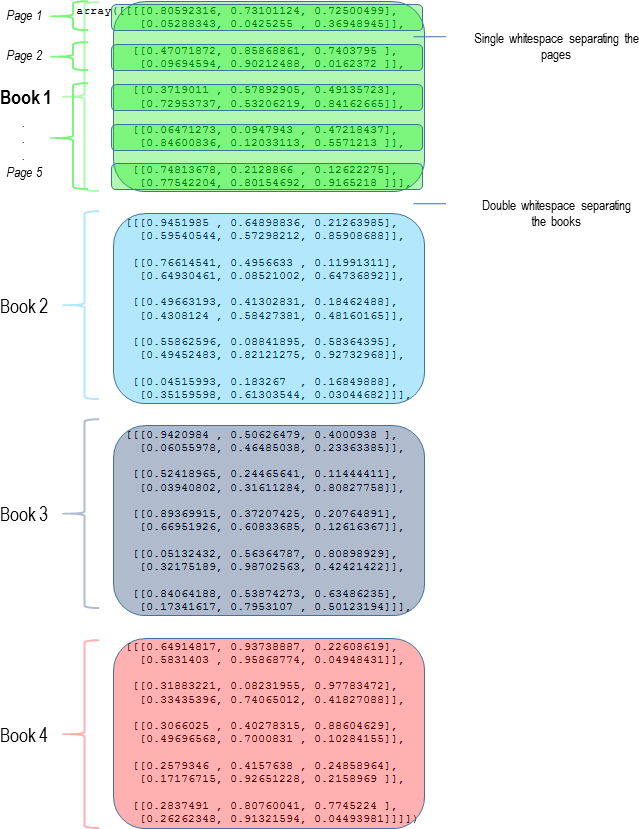

## <a name='Simple_and_Permutations'></a>3. Simple Random Data and Permutations functions
***

### <a name='Simple'></a>Simple Random Data
The corresponding documentations are here: https://docs.scipy.org/doc/numpy/reference/routines.random.html

| Function | Official documentation | Own interpretation |
| -------- | ---------------------- | ------------------ |
| rand(d0, d1, …, dn) | Random values in a given shape | The values are taken from a uniform distribution over [0, 1). By providing more than one argument, multidimensional arrays can be obtained. |
| randn(d0, d1, …, dn) | Return a sample (or samples) from the “standard normal” distribution | Similar to the `rand()` function but from a normal distribution |
| randint(low[, high, size, dtype])	| Return random integers from low (inclusive) to high (exclusive) | Similar to the `rand()` function but from a discrete uniform distribution, because this will return only integers (discrete data) |
| random_integers(low[, high, size]) | Random integers of type np.int between low and high, inclusive | This function is almost the same as `randint()` except that both limits are inclusive (closed interval). When calling this function, Python will return `This function is deprecated. Please call randint(10, 20000 + 1) instead` |
| random_sample([size]) | Return random floats in the half-open interval [0.0, 1.0). | Returns random floating-point numbers similar to `rand()` but only takes one argument indicating the number of values to be return. Therefore, it cannot output multidimensional arrays. |
| random([size]) | Return random floats in the half-open interval [0.0, 1.0). | Same as `random_sample()` - see Note1 below |
| ranf([size]) | Return random floats in the half-open interval [0.0, 1.0). | Same as `random_sample()` |
| sample([size]) | Return random floats in the half-open interval [0.0, 1.0). | Same as `random_sample()` |
| choice(a[, size, replace, p]) | Generates a random sample from a given 1-D array | This is an interesting function, as it allows a random selection of a pre-defined number of values from a 1D array. Alternatively, if an integer is passed to the `a` argument, the function will first create an evenly-spaced Numpy array from the `range()` function before randomly selecting those values. Additionally, the `replace` argument can be used as a form of permutation.  |
| bytes(length) | Return random bytes | Self-explanatory |

<i>Note1: According to the source code for [`numpy.random`](https://github.com/numpy/numpy/blob/master/numpy/random/__init__.py):

<blockquote>
# Some aliases:<br>
ranf = random = sample = random_sample<br>
__all__.extend(['ranf', 'random', 'sample'])
</blockquote></i>

In order to visualize the outputs of the different functions, the code below will create a few variables that can then be examined by plotting the values.

In [6]:
# this will return an array containing 1000 random numbers uniformly-distributed
output_function_rand = np.random.rand(1000)

# this will return an array containing 1000 random numbers normally-distributed
output_function_randn = np.random.randn(1000)

# returns 1000 random integers between 10 (inclusive) and 20,000 (exclusive)
output_function_randint = np.random.randint(10, 2000, 1000)

# select 5 values randomly from the output_function_randint array with replacement
random_selection_from_output_function_randint = np.random.choice(output_function_randint, 5)

#data = [go.Histogram(x=random_array,)]
#iplot(data)

In [7]:
# plots with dropdown menu

trace_uniform = go.Histogram(x=output_function_rand)
trace_normal = go.Histogram(x=output_function_randn)
trace_integer = go.Histogram(x=output_function_randint, xbins=dict(start=0, end = 2000, size=5), autobinx=False )

trace_randomSelection = go.Histogram(x=random_selection_from_output_function_randint,
                                    xbins=dict(start=np.amin(random_selection_from_output_function_randint),
                                              end = np.amax(random_selection_from_output_function_randint),
                                              size = 5), 
                                     autobinx=False)

data = [trace_uniform, trace_normal, trace_integer, trace_randomSelection]

updatemenus = list([
    dict(active=0,
         buttons=list([   
            dict(label = 'rand() function',
                 method = 'update',
                 args = [{'visible': [True, False, False, False]},
                         {'title': '<b>Random numbers from rand() are uniformly distributed</b>'
                          }]),
            dict(label = 'randn() function',         
                 method = 'update',
                 args = [{'visible': [False, True, False, False]},
                         {'title': '<b>Random numbers from randn() are normally distributed</b>'
                          }]),
            dict(label = 'randint() function',
                 method = 'update',
                 args = [{'visible': [False, False, True, False]},
                         {'title': '<b>Random integers from randint() are uniformly distributed</b>',
                          }]),
            dict(label = 'choice() function using values generated from randint()',
                 method = 'update',
                 args = [{'visible': [False, False, False, True]},
                         {'title': '<b>Distribution of randomly-selected values from a larger set of \
randomly-generated integers</b>',
                          }])
        ]),
    )
])

layout = dict(title='<b>Histograms from different numpy.random functions</b>', showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
iplot(fig)

### <a name='Permutations'></a>Permutations

Given a set or an array of numbers, it is possible to arrange the elements within the array in several particular orders.

For instance, the array of [1, 2, 3, 4] can be rearranged as follows:

*Note: the code below uses the Sympy library, a Python library for symbolic computing.*

In [8]:
from sympy.utilities.iterables import multiset_permutations

for possible_array in multiset_permutations([1,2,3,4]):
    print(possible_array)

[1, 2, 3, 4]
[1, 2, 4, 3]
[1, 3, 2, 4]
[1, 3, 4, 2]
[1, 4, 2, 3]
[1, 4, 3, 2]
[2, 1, 3, 4]
[2, 1, 4, 3]
[2, 3, 1, 4]
[2, 3, 4, 1]
[2, 4, 1, 3]
[2, 4, 3, 1]
[3, 1, 2, 4]
[3, 1, 4, 2]
[3, 2, 1, 4]
[3, 2, 4, 1]
[3, 4, 1, 2]
[3, 4, 2, 1]
[4, 1, 2, 3]
[4, 1, 3, 2]
[4, 2, 1, 3]
[4, 2, 3, 1]
[4, 3, 1, 2]
[4, 3, 2, 1]


As shown above, the array can be ordered into 24 sets without replacement. It is actually trivial to calculate the number of possible unique sets by considering the following:

1. If we have an array of 4 elements and we want to select all 4 of them, there are 4 possible options to place in the first position (*i.e.* we can place 1, 2, 3 or 4 first). Let's assume we placed element '3' in the first position.

    Resulting array: 3 _ _ _
    <br>
    
1. If we were to not replace the element back into the original array, then the number of available options now is only 3 (elements 1, 2, and 4). Assume that we place, in the second position, the element 1.

    Resulting array: 3 1 _ _
    <br>

1. Now, we are left with only the elements 2 and 4 (2 options). Let's place '4' in the third position.

    Resulting array: 3 1 4 _
    <br>
    
1. As we do not have any more elements except for '2', we obtained the result below.

    Resulting array: 3 1 4 2
    <br>

In essence, the possible options are 4 x 3 x 2 x 1 = 24, without replacements. In discrete mathematics term, this whole process is called permutation, a subject within combinatorics.

The `choice()` function demonstrated above in the Simple Random Data section, selects a subset of values, with or without replacement, from an array of values. Numpy also has a similar function, `permutation()` to perform permutations. In the `choice()` function, we can specify whether or not to replace the elements, how many elements to be sampled and the probability associated with each element. In contrast, the `permutation()` function is almost like a shuffling function in that it does not take any arguments except for the input sequence/array, as alluded by the official documentation for a particular [example](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html#numpy.random.choice):
> #This is equivalent to np.random.permutation...


The official documentation is located [here](https://docs.scipy.org/doc/numpy/reference/routines.random.html#permutations).

| <div align='center'>Function </div> | <div align='center'>Official documentation </div>| <div align='center'>Own interpretation</div> |
| :------: | :--------------------: | :----------------: |
| permutation(x) | Randomly permute a sequence, or return a permuted range | Elements in an array are ordered randomly. If x is an integer, `permutation(x)` first creates an evenly-spaced array with `np.arange(x)`. This function is similar to `choice`- see explanation above |
| shuffle(x) | Modify a sequence in-place by shuffling its contents | Similar to `permutation()`, except the sequence is modified in-place whereas the former returns a *copy* of the original sequence. The input must be an array |

In [9]:
# reorder the random_arr array randomly
random_arr = [1, 2, 3, 4]
np.random.permutation(random_arr)

array([3, 1, 2, 4])

In [10]:
# note that random_arr is not modified by the permutation() function
random_arr

[1, 2, 3, 4]

In [11]:
# Note, however, that the shuffle() function replaces the original copy of random_arr
np.random.shuffle(random_arr)
random_arr

[1, 3, 4, 2]

## <a name='Distributions_functions'></a>4. Use and purpose of selected “Distributions” functions
***

In this section, the use of beta, exponential, Laplace, Poisson and Rayleigh distributions will be demonstrated along with the practical utility. To this end, we will import the corresponding Numpy and Scipy libraries, with provide convenient functions to generate random numbers that follow different distributions.

In practical terms, modeling a given phenomenon requires fitting the experimental data with a set of known distribution, ideally performed both visually (through graphical plots) and numerically (through the calculation of different statistics, such as *R*^2, sum of squared errors or Bayesian information criterion). A primer on choosing the correct probability distributions is given in [the work of Jonathan Mun](https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119197096.app03).

Throughout the examples below, there will be some differences between the standard form the probability distribution function and the form used by Scipy. However, they are mathematically equivalent so long as the [location (*loc*)](https://en.wikipedia.org/wiki/Location_parameter) and [*scale*](https://en.wikipedia.org/wiki/Scale_parameter
) parameters are taken into account. The former parameter defines the *x* value corresponding to the peak of the curve, allowing for right- or left-shifting of the curve. The *scale* parameter, in contrast, controls the spread or width of the distribution. Note that not all functions have these parameters defined in them.


In [12]:
from scipy.stats import beta, expon, laplace, poisson, rayleigh
from ipywidgets import interactive, HBox, VBox

### <a name='beta_distribution'></a>Beta distribution
Official documentations are available on the [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html#scipy.stats.beta) and [Numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.beta.html#numpy.random.beta) reference webpages.

The beta distribution takes two parameters, α and β (both > 0), that together determine the probability density function (PDF) (*i.e.* the *y* values / curve shape):<br><br>

<div align='center'>
$f(x, a, b) = \frac{\gamma (a+b)x^{a-1}(1-x)^{b-1}} {\gamma(a) \gamma(b)} $
</div><br>

<div align='center'>
for $0 < x < 1, a > 0, b > 0, \gamma(z) = gamma function$, where the gamma function is:
</div><br>

<div align='center'>
$ \varGamma(z) = \int_0^\infty x^{z-1} e^{-x} dx = (z-1)!  $
</div>

The beta distribution can be used to model the following cases:
* Bayesian analysis [Johnson (2016)](https://arxiv.org/pdf/1307.6437.pdf)
* population genetics
* soil science and bioassays [Gupta & Nadarajah (2004)](https://www.crcpress.com/Handbook-of-Beta-Distribution-and-Its-Applications/Gupta-Nadarajah/p/book/9780824753962)

In this section, we will first look at how α and β values determine the shape of the curve, *i.e.* the PDF, based on the Scipy `beta()` function. The code below provides an interactive way to explore the change in the PDF for different values of α and β.


In [13]:
a= b= 1 # we need some a and b values for the initial y
x = np.arange(-0.5, 1, 0.01) # let's plot x from -0.5 to 1
y = beta.pdf(x,a,b) # calculate the beta probability density function using the x, a and b values from above

layout = go.Layout(
    title = '<b>Beta probability density function</b>',
    xaxis = dict(title='x'),
    yaxis = dict(title='PDF'),
)

# plot y over x as a scatter plot
f = go.FigureWidget(data=[go.Scatter(x=x, y=y)], layout = layout)

# we need to assign the slider to a function - this slider is actually from ipywidgets and not from plotly
def beta_function(a,b):
    f.data[0].y = beta.pdf(x,a,b)

parameter_slider = interactive(beta_function, a=(0.1, 50, 0.1), b=(0.1, 50, 0.1))
vb = VBox((f, parameter_slider))
vb.layout.align_items = 'center'
vb

    'data': [{'type': 'scatter',
              'uid': 'd61f093f-730b-4373-b3e6-1…

Now we know how the PDF of beta distribution is dependent on α and β values, we can ask Numpy to generate a set of 1000 random values with a few different combinations of α and β, using the Numpy `beta` function.

Note that the Scipy `beta()` function above returns the PDF whereas the `numpy.random.beta()` function generates random numbers.

In [14]:
# generate 1000 random values with different α and β values
betaValues_alpha11_beta01 = np.random.beta(1.1,0.1,1000)
betaValues_alpha01_beta01 = np.random.beta(0.1,0.1,1000)
betaValues_alpha80_beta48 = np.random.beta(8.0,48,1000)

# plot all the variables - reference: https://plot.ly/python/histograms/
data = [
    go.Histogram(x=betaValues_alpha11_beta01, opacity=0.75, name = 'α = 1.1, β = 0.1'),
    go.Histogram(x=betaValues_alpha01_beta01, opacity=0.75, name = 'α = 0.1, β = 0.1'),
    go.Histogram(x=betaValues_alpha80_beta48, opacity=0.75, name = 'α = 8.0, β = 48')
]

layout = go.Layout(
    barmode='overlay',
    title = '<b>Distribution of randomly-generated numbers based on <br>beta distributions with different input parameters</b>',
    xaxis = dict(title='Value'),
    yaxis = dict(title='Count')
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

The Plotly library also comes with the ability to make distplots where the data distribution is shown along with a histogram and a fitted line.

In [15]:
hist_data = [betaValues_alpha11_beta01, betaValues_alpha01_beta01, betaValues_alpha80_beta48]
group_labels = ['α = 1.1, β = 0.1', 'α = 0.1, β = 0.1', 'α = 8.0, β = 48']

# figure_factory functions work slightly differently from standard plotly functions
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.2)
fig['layout'].update(
    title='<b>Distribution of randomly-generated numbers based on <br>beta distributions with different input parameters</b>')

iplot(fig)

***
### <a name='exponential_distribution'></a>Exponential distribution
The official documentations for the corresponding libraries can be found on the [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) and [Numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.exponential.html#numpy.random.exponential) pages.

The exponential distribution function, also known as the negative exponential distribution, has a really simple form:
<br><br>

<div style="text-align:center">
$f(x) = \lambda e^{-\lambda x}$
</div><br>

This function is only defined for all positive numbers [0, ∞], unlike the [Laplace distribution](#laplace_distribution), and is related to the [Poisson distribution](#poisson_distribution). However, the Poisson distribution has a discrete function - it concerns only events that happen over a fixed interval of time or space. In contrast, the exponential distribution models events over a continuous interval [(reference)](https://www.statisticshowto.datasciencecentral.com/exponential-distribution/).

Although the main use of this function is to explain the time between events in a Poisson point process, it can also be used to [model other scenarios](https://www.hindawi.com/journals/jps/2017/2106748/):
* bout (meal) criteria for analysis of animal behaviour [Yeates *et al.*, 2001](https://www.sciencedirect.com/science/article/pii/S0022519301924257?via%3Dihub)
* rainfall estimation and analysis [Madi & Raqab, 2007](https://onlinelibrary.wiley.com/doi/abs/10.1002/env.826)
* episode peak and duration for ecohydroclimatic applications [Biondi *et al.*, 2008](https://www.sciencedirect.com/science/article/pii/S0304380007004838?via%3Dihub)
* mean life of power system equipment with limited end-of-life failure data [Cota-Felix *et al.*, 2009](https://ieeexplore.ieee.org/document/5281863)

Using the Scipy `expon.pdf()` function, we can generate illustrative probability density function curves with different parameters to determine their effect on the distribution. The figure below is fully interactive, so the *loc* and *scale* parameters are tunable.

In [16]:
loc = scale = 1 # we need some loc and scale values for the initial y
x = np.arange(0, 400, 0.1) # let's plot x from 0 to 400 
y = expon.pdf(x,loc,scale) # calculate the expon PDF using the x, loc and scale values from above

layout = go.Layout(
    title = '<b>Exponential probability density function</b>',
    xaxis = dict(title='<i>x</i>'),
    yaxis = dict(title='PDF'),
)

# plot y over x as a scatter plot
f = go.FigureWidget(data=[go.Scatter(x=x, y=y)], layout = layout)

# we need to assign the slider to a function - this slider is actually from ipywidgets and not from plotly
def exponential_function(loc,scale):
    f.data[0].y = expon.pdf(x,loc,scale)

parameter_slider = interactive(exponential_function, loc=(0, 50.1, 0.1), scale=(0.01, 50.1, 0.1))
vb = VBox((f, parameter_slider))
vb.layout.align_items = 'center'
vb

    'data': [{'type': 'scatter',
              'uid': 'c7ca417b-9687-456a-81b9-6…

The *loc* parameter determines the *x* value corresponding to the peak PDF while *scale* determines the curve steepness, especially for the *x* values beyond that of the peak PDF.

Based on the influences of the *loc* and *scale* parameters, we can now generate and visualize the Numpy-generated random numbers that follow an exponential distribution. The numpy `exponential()` only takes the *scale* value as an argument, not the *loc*.

In [17]:
# generate 1000 random values with different scale values
exponValues_scale01 = np.random.exponential(0.1,1000)
exponValues_scale1 = np.random.exponential(1,1000)
exponValues_scale10 = np.random.exponential(10,1000)

# plot all the variables - reference: https://plot.ly/python/histograms/
data = [
    go.Histogram(x=exponValues_scale01, opacity=0.95, name = 'scale = 0.1'), # opacity = 0.95 to better see the curve
    go.Histogram(x=exponValues_scale1, opacity=0.35, name = 'scale = 1'),
    go.Histogram(x=exponValues_scale10, opacity=0.35, name = 'scale = 10')
]

layout = go.Layout(
    barmode='overlay',
    title = '<b>Distribution of randomly-generated numbers based on <br>beta distributions with different input parameters</b>',
    xaxis = dict(title='Value'),
    yaxis = dict(title='Count')
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Note the extremely narrow range of the random numbers generated with a scale of 0.1. In other words, the distribution falls on rapidly. This is better visualized with a distplot. You can play around with the range slider at the bottom of the plot.

In [18]:
hist_data = [exponValues_scale01, exponValues_scale1, exponValues_scale10]

group_labels = ['scale = 0.1', 'scale = 1', 'scale = 10']

# figure_factory functions work slightly differently from standard plotly functions
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.2)

fig['layout'].update(
    title='<b>Distribution of randomly-generated numbers based on <br>exponential distributions with scale parameters</b>',
    xaxis = dict(title='Value'),
    yaxis = dict(title='Count')
    )

iplot(fig)

***
### <a name='laplace_distribution'></a>Laplace distribution

The official documentations for the corresponding libraries can be found on the [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.laplace.html#scipy.stats.laplace) and [Numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.laplace.html#numpy.random.laplace) pages.

The Laplace distribution, also called the double exponential distribution (law of the difference between two exponential random variables) [Aryal (2006)](https://scholarcommons.usf.edu/etd/2444/), is named after the French polymath, [Pierre-Simon Laplace](https://www.britannica.com/biography/Pierre-Simon-marquis-de-Laplace). The function for this distribution is defined for all real numbers (unlike the exponential distribution), and is therefore a continuous distribution function:

<br>

<div align='center'>
Standard form:
    
</div>

<div style="text-align:center">
$f(x) = \frac{1}{2b} e^{-\frac {|x-\mu|}{b} }$
</div><br>

<div align='center'>
Scipy form:<br>
where $b = 1, \mu=0$
</div>

<div style="text-align:center">
$f(x) = \frac{1}{2} e^{- |x| }$
</div>


Examples of scenarios that can be explained according to the Laplace distribution include:
* [daily sunspot numbers](https://arxiv.org/abs/1210.3119)
* [flow cytometry for bacterial size measurements](https://www.idescat.cat/sort/sort322/32.2.2.julia-etal.pdf)
* [encoding and decoding (codec) of analog signals](https://www.springer.com/us/book/9780817641665) (Kotz *et al.*, 2001)
* share market return models (same reference as above)


Using the Scipy `laplace.pdf()` function, we can generate illustrative probability density function curves with different parameters to determine their effect on the distribution. The figure below is fully interactive, so the *loc* and *scale* parameters are tunable.

In [29]:
loc = scale = 1 # we need some loc and scale values for the initial y
x = np.arange(-250, 250, 0.1) # let's plot x from -250 to 250
y = laplace.pdf(x,loc,scale) # calculate the expon PDF using the x, loc and scale values from above

layout = go.Layout(
    title = '<b>Laplace probability density function</b>',
    xaxis = dict(title='<i>x</i>'),
    yaxis = dict(title='PDF'),
)

# plot y over x as a scatter plot
f = go.FigureWidget(data=[go.Scatter(x=x, y=y)], layout = layout)

# we need to assign the slider to a function - this slider is actually from ipywidgets and not from plotly
def laplace_function(loc,scale):
    f.data[0].y = laplace.pdf(x,loc,scale)

parameter_slider = interactive(laplace_function, loc=(-50, 50.1, 0.1), scale=(0.01, 50.1, 0.1))
vb = VBox((f, parameter_slider))
vb.layout.align_items = 'center'
vb

    'data': [{'type': 'scatter',
              'uid': '6eb9feb8-8fc5-4f2d-b56a-3…

Thanks to the interactive plot above, it is evident that the *loc* parameter shifts the value of *x* corresponding to the maximum PDF value while *scale* changes the curve width. We can also generate random numbers according to the Laplace distribution using the Numpy `laplace()` function, which takes both the *scale* and *loc* values as arguments.

In [20]:
# generate 1000 random values with different scale values

laplaceValues_loc01_scale01 = np.random.laplace(0.1,0.1,1000)
laplaceValues_loc01_scale1 = np.random.laplace(0.1, 1, 1000)
laplaceValues_loc1_scale1 = np.random.laplace(1,1,1000)

# plot all the variables - reference: https://plot.ly/python/histograms/
data = [
    go.Histogram(x=laplaceValues_loc01_scale01, opacity=0.95, name = 'loc = 0.1, scale = 0.1'), # opacity = 0.95 to better see the curve
    go.Histogram(x=laplaceValues_loc01_scale1, opacity=0.5, name = 'loc = 0.1, scale = 1'),
    go.Histogram(x=laplaceValues_loc1_scale1, opacity=0.5, name = 'loc = 1, scale = 1')
]
layout = go.Layout(
    barmode='overlay',
    title = '<b>Distribution of randomly-generated numbers based on <br>Laplace distributions with different input parameters</b>',
    xaxis = dict(title='Value'),
    yaxis = dict(title='Count')
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

With a scale of 0.1, the random numbers are generated with an extremely narrow range. This is better visualized with a distplot, which comes with an interactive range slider at the bottom of the plot.

In [21]:
hist_data = [laplaceValues_loc01_scale01, laplaceValues_loc01_scale1, laplaceValues_loc1_scale1]

group_labels = ['loc = 0.1, scale = 0.1', 'loc = 0.1, scale = 1', 'loc = 1, scale = 1']

# figure_factory functions work slightly differently from standard plotly functions
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.2)
fig['layout'].update(
    title='<b>Distribution of randomly-generated numbers based on <br>Laplace distributions with different parameters</b>',
    xaxis = dict(title='Value'),
    yaxis = dict(title='Count')
    )

iplot(fig)

***
### <a name='poisson_distribution'></a> Poisson distribution

The official documentations for the corresponding libraries can be found on the [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson) and [Numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.poisson.html#numpy.random.poisson) pages.

The Poisson distribution is [named after Baron Siméon Denis Poisson, a French mathematician, engineer and physicist](https://www.britannica.com/biography/Simeon-Denis-Poisson). Unlike the distributions above, the Poisson probability mass function is a discrete distribution, meaning it is only defined for positive integer values (*k*).


<div align='center'>
$f(k) = \mathit{e^{-\mu}} \frac{\mu^k}{k!}$
</div>

This distribution is usually used to model events within a predefined period of time or space that occur with a constant rate. Furthermore, the events occur independently, *i.e*, without influence of the prior event. The Poisson distribution is a special limiting case of a binomial distribution where the number of samples/trials is very large and the probability of a particular event occurring is very small. A few examples of Poisson-type events are:
* the number of deaths by accidental horse kicking in the Prussian army - [Pandit (2015)](https://onlinelibrary.wiley.com/doi/full/10.1111/anae.13261)
* number of typographical errors on a page
* radioactive decay (although see this paper: [Sitek *et al.*, 2015](https://www.sciencedirect.com/science/article/pii/S1120179715009011))


Reference:
[Interactive Math](https://www.intmath.com/counting-probability/13-poisson-probability-distribution.php)

Using the Scipy `poisson.pmf()` function, we can generate illustrative probability mass function curves with different parameters to determine their effect on the distribution. The figure below is fully interactive, so you can tune the loc and scale parameters.

In [22]:
mu = loc = 1 # we need some loc and scale values for the initial y
x = np.arange(0, 150, 0.01) # let's plot x from 0 to 150 in a very fine interval to make visible sharp discrete peaks
y = poisson.pmf(x,mu,loc) # calculate the Poisson PMF using the x, mu and loc values from above

layout = go.Layout(
    title = '<b>Poisson probability mass function</b>',
    xaxis = dict(title='<i>x</i>'),
    yaxis = dict(title='PMF'),
)

# plot y over x as a scatter plot
f = go.FigureWidget(data=[go.Scatter(x=x, y=y)], layout = layout)

# we need to assign the slider to a function - this slider is actually from ipywidgets and not from plotly
def poisson_function(mu,loc):
    f.data[0].y = poisson.pmf(x,mu,loc)

parameter_slider = interactive(poisson_function, mu=(0, 50, 1), loc=(0, 50, 1))
vb = VBox((f, parameter_slider))
vb.layout.align_items = 'center'
vb

    'data': [{'type': 'scatter',
              'uid': 'f8ca8d31-7743-4429-85a8-a…

Let's now generate 1000 random numbers according to the Poisson distribution. Note from above that the loc value determines the $x$ value corresponding to the highest (peak) value of the PMF curve, while $mu$ influences the curve width.

To generate the random numbers, we use the Numpy `poisson()` function while passing different takes only the lambda/mu as an argument (Scipy uses the term mu while Numpy uses lambda - both are the same).

In [23]:
# generate 1000 random values with different lambda values
poissonValues_lambda01 = np.random.poisson(0.1,1000)
poissonValues_lambda1 = np.random.poisson(1, 1000)
poissonValues_lambda10 = np.random.poisson(10,1000)

data = [
    # plot all the variables - reference: https://plot.ly/python/histograms/
    go.Histogram(x=poissonValues_lambda01, opacity=0.95, name = 'lambda = 0.1'), # opacity = 0.95 to better see the curve
    go.Histogram(x=poissonValues_lambda1, opacity=0.5, name = 'lambda = 1'),
    go.Histogram(x=poissonValues_lambda10, opacity=0.5, name = 'lambda = 10')
    ]

layout = go.Layout(
    barmode='overlay',
    title = '<b>Distribution of randomly-generated numbers based on <br>Poisson distributions with different lambda parameters</b>',
    xaxis = dict(title='Value'),
    yaxis = dict(title='Count')
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

The distplot below is similar to the histogram above, but also comes with a great distribution slider and plots the curve automatically.

In [24]:
hist_data = [poissonValues_lambda01, poissonValues_lambda1, poissonValues_lambda10]

group_labels = ['lambda = 0.1', 'lambda = 1', 'lambda = 10']

# figure_factory functions work slightly differently from standard plotly functions
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.2)
fig['layout'].update(
    title='<b>Distribution of randomly-generated numbers based on <br>Poisson distributions with different lambda parameters</b>',
    xaxis = dict(title='Value'),
    yaxis = dict(title='Count')
    )

iplot(fig)

***
### <a name='rayleigh_distribution'></a>Rayleigh distribution

The official documentations for the corresponding libraries can be found on the [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rayleigh.html#scipy.stats.rayleigh) and [Numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rayleigh.html#numpy.random.rayleigh) pages.

The Rayleigh probability distribution function is a continuous function for positive random values, named after Lord Rayleigh [[1](https://en.wikipedia.org/wiki/John_William_Strutt,_3rd_Baron_Rayleigh) and [2](http://www.randomservices.org/random/special/Rayleigh.html)]. The Rayleigh distribution is special cases of Weibull and Rice distributions. 

Real-life events that follow the Rayleigh distribution are generally related to those with age-dependent lifetime, such as: 
* wave heights
* sound and light radiation
* radio signals
* wind power - wind speeds at wind turbine sites
* ultrasound image models
* lifetime of electric and electronic components

References:

[Aslam *et al.*, 2015](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4439070/)

[Bhattacharya & Tyagi, 1990](https://link.springer.com/article/10.1007%2FBF02863540)

Using the Scipy `rayleigh.pdf()` function, we can generate illustrative curves with different parameters to determine their effect on the distribution. The figure below is fully interactive, so you can tune the *loc* and *scale* parameters.

In [25]:
loc = scale = 1 # we need some initial loc and scale values to calculate the initial y
x = np.arange(0, 200, 0.1) # let's plot x from 0 to 200
y = rayleigh.pdf(x,loc,scale) # calculate the rayleigh PDF using the x, loc and scale values from above

layout = go.Layout(
    title = '<b>Rayleigh probability density function</b>',
    xaxis = dict(title='<i>x</i>'),
    yaxis = dict(title='PDF'),
)

f = go.FigureWidget(data=[go.Scatter(x=x, y=y)], layout = layout)

# we need to assign the slider to a function - this slider is actually from ipywidgets and not from plotly
def rayleigh_function(loc,scale):
    f.data[0].y = rayleigh.pdf(x, loc, scale)

parameter_slider = interactive(rayleigh_function, loc=(0, 50, 1), scale=(0.1, 50, 0.1))
vb = VBox((f, parameter_slider))
vb.layout.align_items = 'center'
vb

    'data': [{'type': 'scatter',
              'uid': '64a062f1-3c5e-4e19-a0ab-3…

Note from above that the *loc* value determines the *x* value corresponding to the highest (peak) value of the PDF curve while the *scale* parameter changes the width of the curve.

Based on the interactive plot above, we can now generate 1000 random numbers according to the Rayleigh distribution with 3 sets of *scale* values. The numpy `rayleigh()` takes only the scale as an argument, although the peak can be shifted by multiplying these values by a constant (similar to the *loc* parameter).

In [26]:
# generate 1000 random values with different scale values
rayleighValues_scale01 = np.random.rayleigh(0.1,1000)
rayleighValues_scale1 = np.random.rayleigh(1, 1000)
rayleighValues_scale5 = np.random.rayleigh(5,1000)

# plot all the variables - reference: https://plot.ly/python/histograms/
data =[
        go.Histogram(x=rayleighValues_scale01, opacity=0.95, name = 'scale = 0.1'), # opacity = 0.95 for clearer curve
        go.Histogram(x=rayleighValues_scale1, opacity=0.5, name = 'scale = 1'),
        go.Histogram(x=rayleighValues_scale5, opacity=0.5, name = 'scale = 5')
]

layout = go.Layout(
    barmode='overlay',
    title = '<b>Distribution of randomly-generated numbers based on <br>Rayleigh distributions with different scale parameters</b>',
    xaxis = dict(title='Value'),
    yaxis = dict(title='Count')
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Using the `distplot()` function, an alternative form the plot above can be obtained.

In [27]:
hist_data = [rayleighValues_scale01, rayleighValues_scale1, rayleighValues_scale5]

group_labels = ['scale = 0.1', 'scale = 1', 'scale = 5']

# figure_factory functions work slightly differently from standard plotly functions
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.2)
fig['layout'].update(
    title='<b>Distribution of randomly-generated numbers based on <br>Rayleigh distributions with different scale parameters',
    xaxis = dict(title='Value'),
    yaxis = dict(title='Count')
    )

iplot(fig)

***
## <a name='Seeds'></a> 5. Use of seeds in generating pseudorandom numbers

As mentioned earlier in the ['Why use `numpy.random`?'](#Why_use_nprandom) section, `numpy.random` uses the Mersenne Twister method to generate pseudorandom numbers, which requires a starting value (a seed). This is not limited to Mersenne Twister only, as any linear recursion method works in a similar fashion.

Once a seed value is passed to the algorithm, a random number can then be generated. Although seed itself is not required to be random, some users prefer to use a random number generated by a true random number generator. In cases where security is paramount, CPRNG should be used and the seeds kept secret. In fact, it has been reported that [low randomness of the seeds could impair the security across networks](https://www.bbc.com/news/technology-33839925).

Typically, users do not pass a seed value to a pseudorandom number generator, except in cases where [repeatability is needed](https://stats.stackexchange.com/questions/354373/what-exactly-is-a-seed-in-a-random-number-generator).

`numpy.random` obtains the seed by first querying the [`/dev/random` or equivalent files (Unix-based operating systems)](https://en.wikipedia.org/wiki//dev/random) or the [Windows-equivalent CryptGenRandom](https://docs.microsoft.com/en-us/windows/desktop/api/wincrypt/nf-wincrypt-cryptgenrandom) before using the clock time ([reference](https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do)).

The effect of setting a fixed seed can be seen by comparing the outputs below:

In [28]:
# print 6 random numbers without and with a fixed seed
# use 6 here because the layout is better

# not setting a fixed seed - default behavior

print('No fixed seed - Run 1: ', np.random.rand(6))
print('No fixed seed - Run 2: ', np.random.rand(6))

np.random.seed(10) # arbitrarily chose 10
print('With fixed seed - Run 1: ', np.random.rand(6))

np.random.seed(10) # this function needs to be invoked every time before calling rand()
print('With fixed seed - Run 2: ', np.random.rand(6))

No fixed seed - Run 1:  [0.46904627 0.05529631 0.78748058 0.56700387 0.59015013 0.12988502]
No fixed seed - Run 2:  [0.63690863 0.35587671 0.42171753 0.30891325 0.04633548 0.69967782]
With fixed seed - Run 1:  [0.77132064 0.02075195 0.63364823 0.74880388 0.49850701 0.22479665]
With fixed seed - Run 2:  [0.77132064 0.02075195 0.63364823 0.74880388 0.49850701 0.22479665]


***
## <a name='Conclusion'></a>6. Conclusion

Using an interactive plotting technique, this notebook illustrates the functions provided by the Scipy and Numpy libraries. Although slightly more complicated, the use of the Plotly library, instead of Matplotlib, is justified by the high interactivity provided. We have also looked at the beta, exponential, Laplace, Poisson and Rayleigh distributions and their application to real-life problems. By having handy functions, it is possible to simulate these problems and develop codes for debugging and noise generation/reduction for predictive modeling, among others.

Overall, the Jupyter notebook is a great method to highlight different code snippets and to compare and contrast various alternative approaches. In this case, a Jupyter notebook has been created to simulate different Scipy and Numpy functions related to random number generation. The use of the Plotly library can be considered almost critical for good visualization and 'storytelling' especially for the non-technical colleagues or managers.